In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as st
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [25]:
# Find the most recent date in the data set.
engine.execute(text('SELECT MAX(date) FROM measurement')).all()

[('2017-08-23',)]

In [12]:
# Find the most recent date in the data set (different method).
conn = engine.connect()
measurement_df = pd.read_sql('SELECT * FROM Measurement', conn)
measurement_df['date'].max()

'2017-08-23'

In [13]:
# Set query date as variable
query_date = dt.date(2017, 8, 23)

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
one_year_ago = query_date - dt.timedelta(days=365)

# Perform a query to retrieve and sort the data and precipitation scores
last_12_months = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= one_year_ago).order_by(Measurement.date.desc()).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(last_12_months, columns=[['date', 'percipitation']])


<Axes: xlabel='Date', ylabel='Percipitation (inches)'>

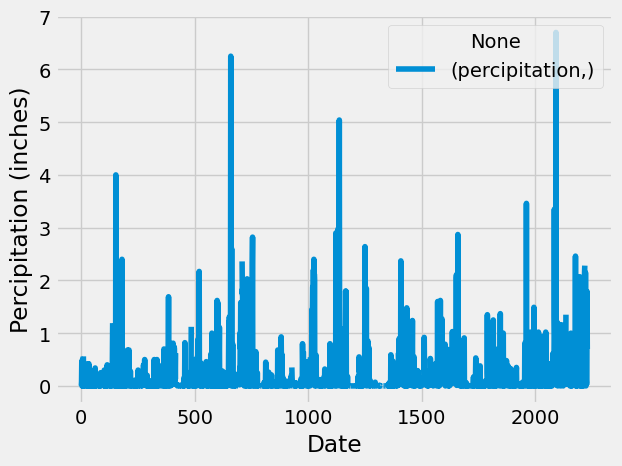

In [15]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(xlabel='Date', ylabel='Percipitation (inches)')

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
df['percipitation'].describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station).count()


9

In [18]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
engine.execute(text('SELECT station, COUNT(station)\
    FROM measurement\
    GROUP BY station\
    ORDER BY COUNT(station) DESC')).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
engine.execute(text('SELECT MIN(tobs), MAX(tobs), AVG(tobs)\
    FROM measurement\
    WHERE station = "USC00519281"')).all()

[(54.0, 85.0, 71.66378066378067)]

In [20]:
# Using the most active station id
data2 = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').filter(Measurement.date >= one_year_ago)

temps_df = pd.DataFrame(data2)
temps_df


,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


<Axes: ylabel='Frequency'>

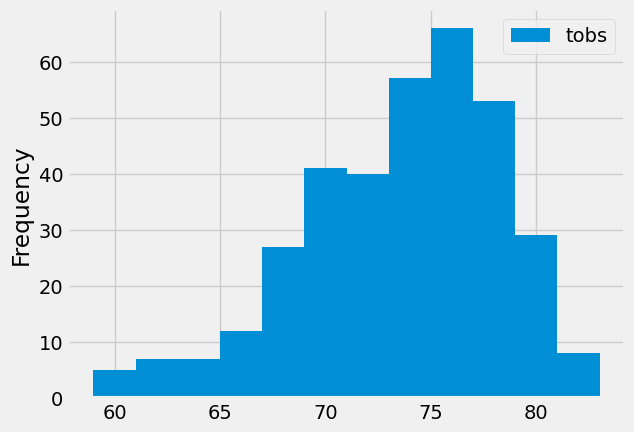

In [21]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

temps_df.plot(kind='hist', bins=12, xlabel='Temperature')


# Close Session

In [22]:
# Close Session
session.close()